<a href="https://colab.research.google.com/github/jsedoc/ConceptorDebias/blob/master/Debias_Contextualized_Representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -U pymagnitude
!wget http://magnitude.plasticity.ai/elmo/medium/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude
from pymagnitude import *
elmo_vecs = Magnitude('./elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude')

Requirement already up-to-date: pymagnitude in /usr/local/lib/python3.6/dist-packages (0.1.120)
--2019-02-27 19:47:15--  http://magnitude.plasticity.ai/elmo/medium/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude
Resolving magnitude.plasticity.ai (magnitude.plasticity.ai)... 52.216.9.90
Connecting to magnitude.plasticity.ai (magnitude.plasticity.ai)|52.216.9.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54497280 (52M) [binary/octet-stream]
Saving to: ‘elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude.1’

elmo_2x1024_128_204 100%[===================>]  51.97M  33.2MB/s    in 1.6s    

2019-02-27 19:47:17 (33.2 MB/s) - ‘elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude.1’ saved [54497280/54497280]



In [0]:
import numpy as np
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tqdm import tqdm
import nltk

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels=['']):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    print(X_fit.shape, label_types, num_labels, colors)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab, col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i, 0] for i in idxs],
                               [X_fit[i, 1] for i in idxs],
                               c=col, label=lab)
                else:
                    ax.scatter(X_fit[:, 0],
                               X_fit[:, 1],
                               c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        if num_labels>1:
            ax.legend()
        plt.show()

In [0]:
def pick_embeddings(corpus, sent_embs, word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

In [16]:
nltk.download('brown')
from nltk.corpus import brown
brown_subset_news_editorial_reviews = brown.sents(categories=['news', 'editorial', 'reviews'])
len(brown_subset_news_editorial_reviews)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


9371

In [17]:
brown_subset_embs = [elmo_vecs.query(s) for s in tqdm(brown_subset_news_editorial_reviews)]

  0%|          | 0/9371 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))
100%|██████████| 9371/9371 [14:03<00:00, 11.10it/s]


In [0]:
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['he','she'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(1005, 2) ['he', 'she'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


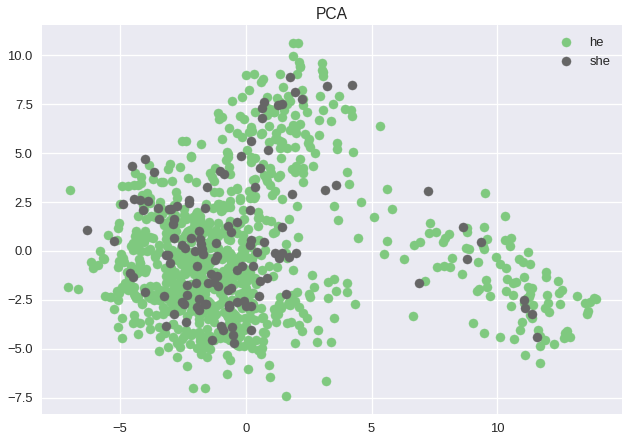

In [19]:
do_plot(PCA(n_components=2).fit_transform(X), 'PCA', labels=labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(73, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


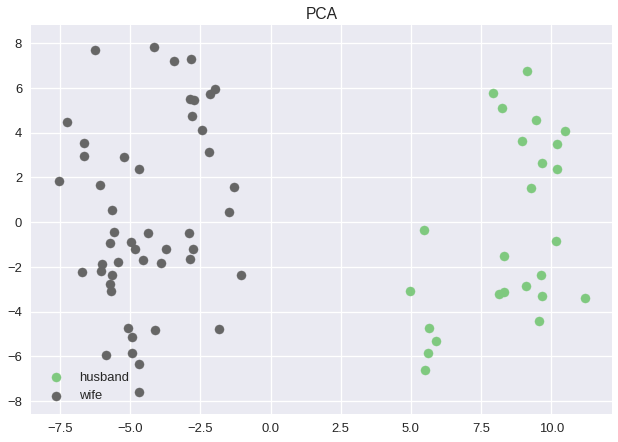

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(194, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


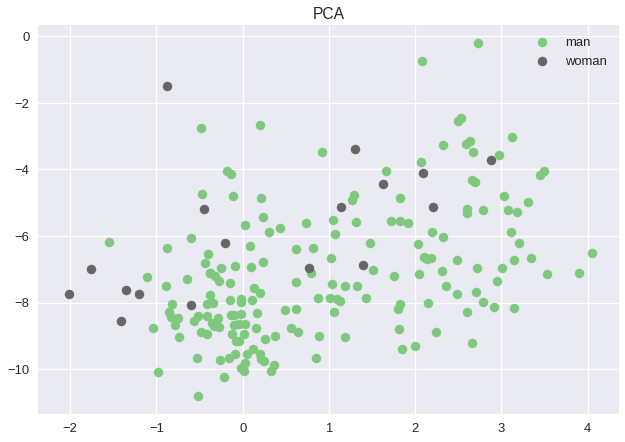

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(82, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


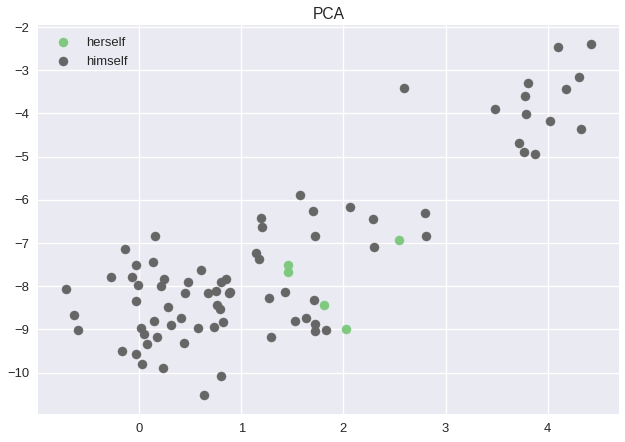

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(45, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


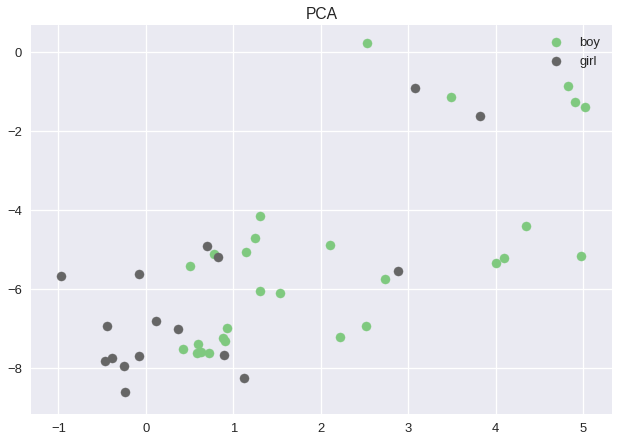

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(127, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


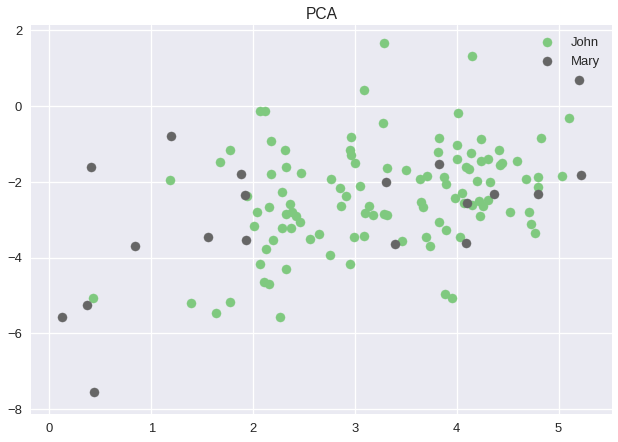

In [21]:
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['husband', 'wife'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(200, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


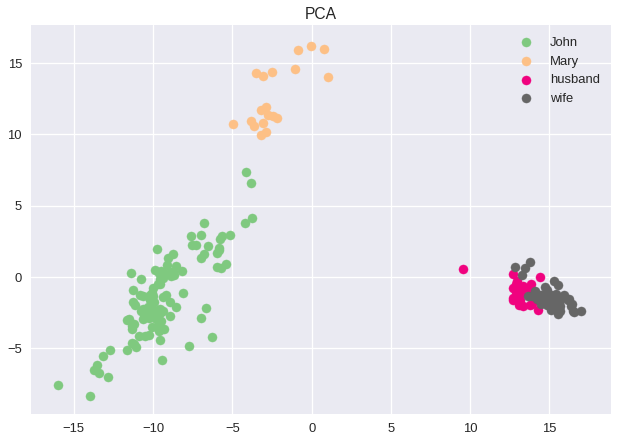

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(194, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


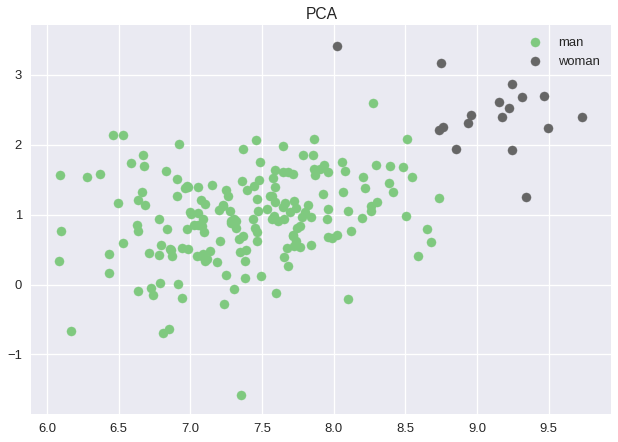

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(82, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


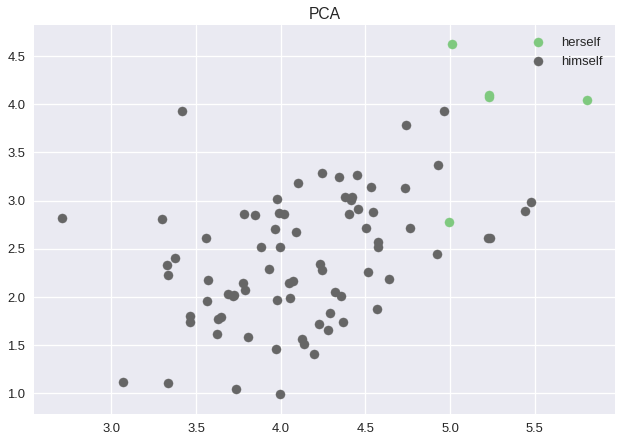

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(45, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


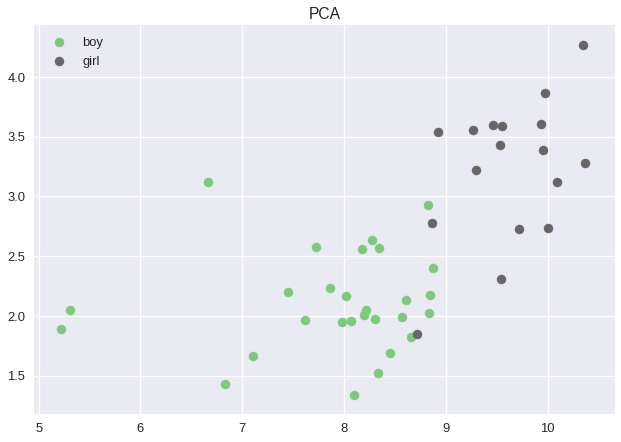

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(127, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


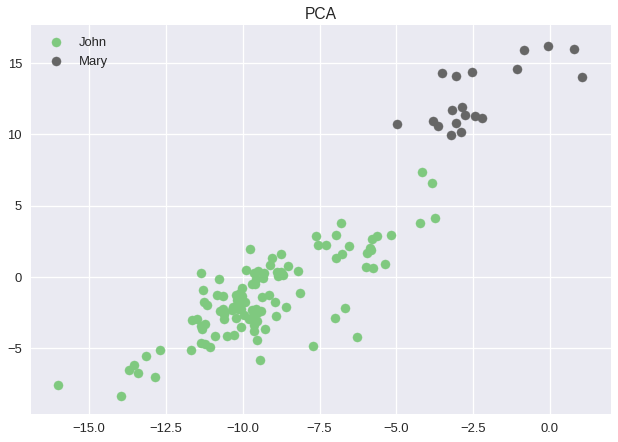

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(73, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


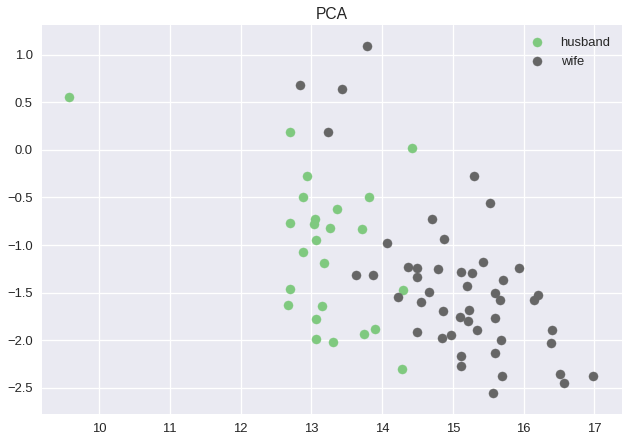

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(72, 2) ['David', 'Robert'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


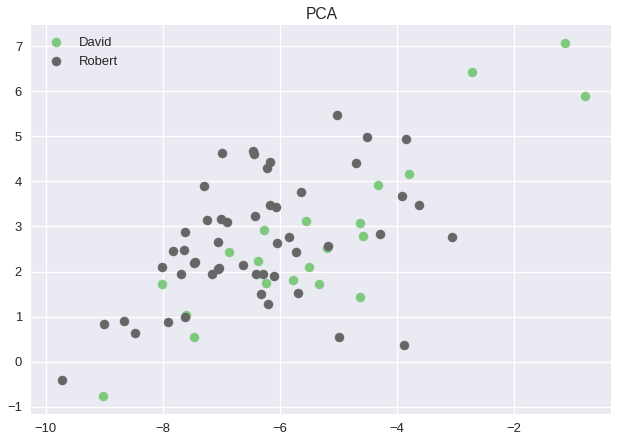

In [23]:
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_subset_news_editorial_reviews, brown_subset_embs, ['David', 'Lauren', 'Robert', 'Niki'])
do_plot(pca.transform(X), 'PCA', labels=labels)

In [24]:
brown_corpus = brown.sents()
brown_embs = [elmo_vecs.query(s) for s in tqdm(brown_corpus)]

  0%|          | 0/57340 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pymagnitude/third_party/allennlp/nn/util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))
100%|██████████| 57340/57340 [1:22:18<00:00,  9.75it/s]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(805, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


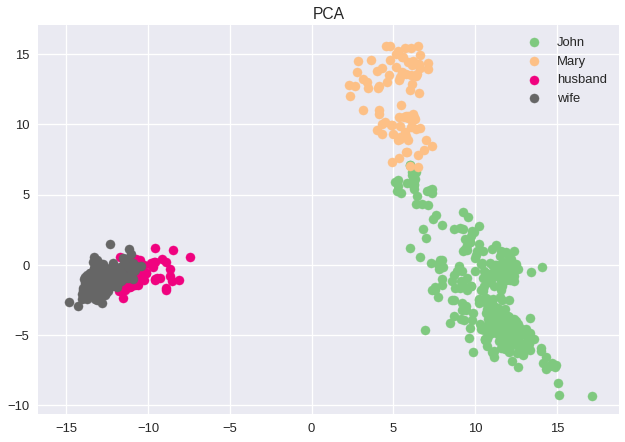

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(1368, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


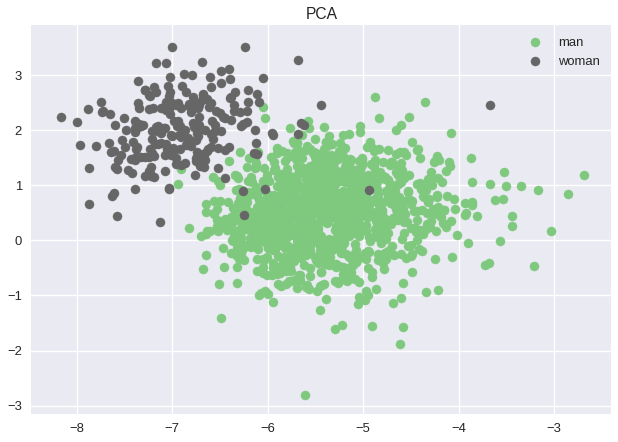

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(724, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


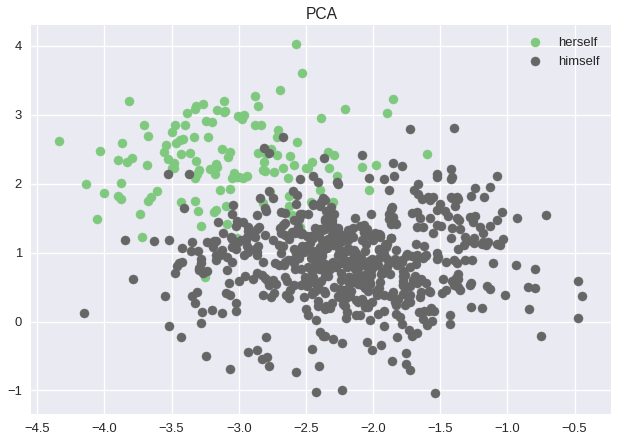

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(446, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


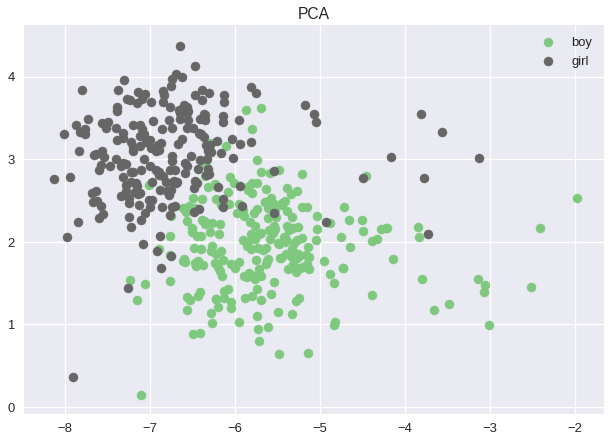

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(447, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


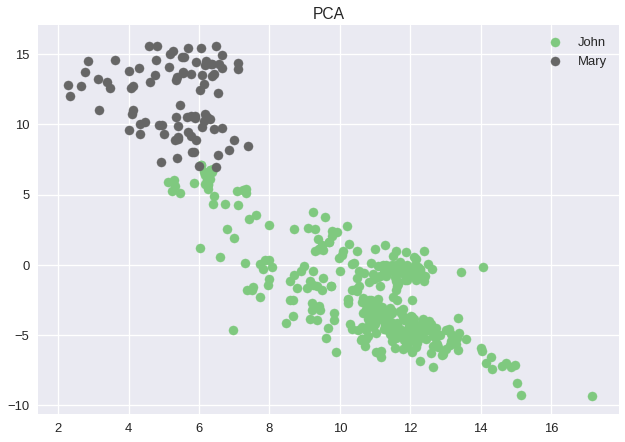

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(358, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


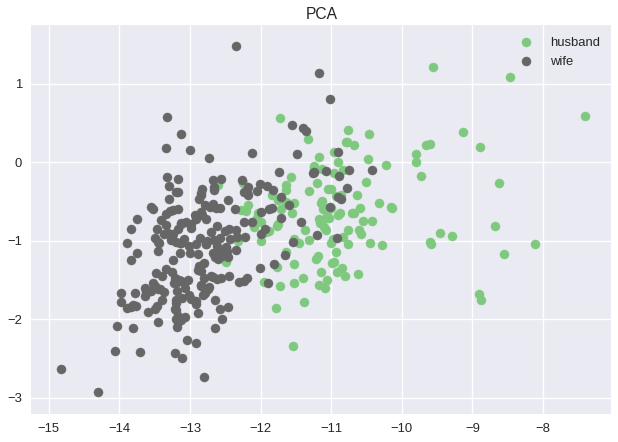

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(145, 2) ['Bonnie', 'David', 'Lauren', 'Robert'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]


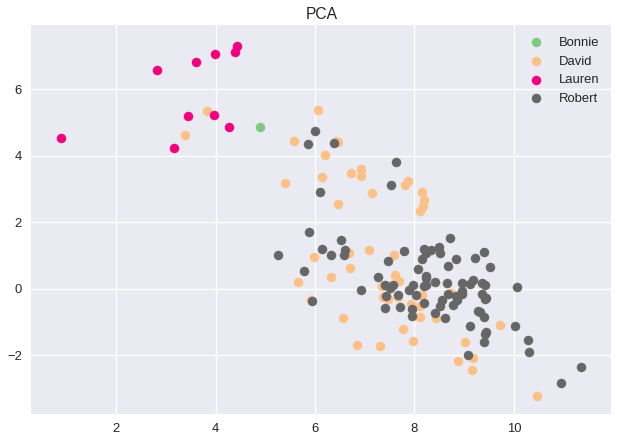

In [26]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['David', 'Lauren', 'Robert', 'Bonnie'])
do_plot(pca.transform(X), 'PCA', labels=labels)

In [1]:
import pickle
pickle.dump({'elmo_bce':brown_embs}, open( "elmo_brown_corpus.pkl", "wb" ))

NameError: ignored